<a href="https://colab.research.google.com/github/iAmTinku/MessingAroundWithFaces/blob/main/DMfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Step: Load data

1. Move data to a shared google drive
2. Access data from colab
3. Preprocess data
  - Resize images
  - Extract Labels into seperate array
  - Convert images into black and white for now, to reduce complexity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tarfile

# Path to the shared tar.gz file (update as needed)
tar_path = '/content/drive/MyDrive/DataminingProject/Faces/part1.tar.gz'

# Extract the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall('/content/UTKFace')  # Extract to a local folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List files in the root of the Drive (this should include "MyDrive" if the drive is mounted correctly)
print(os.listdir('/content/drive/MyDrive'))

['Beloved.gdoc', 'Blindness.gdoc', 'HAHA Success Bound .gdoc', 'Case Study 1.gdoc', 'Portfolio Assignment 1B SB.gdoc', 'Personal Profile Questions SB .gdoc', 'SB Notes.gdoc', 'Portfolio Assignment 3 .gdoc', 'Personal Profile Question SB 2.gdoc', 'Personal Statement SB.gdoc', 'Week 4 Internal External Locus  - Bar chart 1.gsheet', 'Week 4 Internal External Locus .gdoc', 'C. Bolanos - Recommendation List .gdoc', 'Reflection Journal .gdoc', 'Case Study 3 .gdoc', 'FLip The GiRd.gdoc', 'Case Study 2 SB .gdoc', 'Untitled document (15).gdoc', 'Untitled document (14).gdoc', 'nj-stars-contract.pdf', 'nj-stars-contract.gdoc', 'Diagnostic Essay .gdoc', 'Mock Question.gdoc', 'Memory Email.gdoc', 'Aristotle Politics Essay .gdoc', 'Intro Documented Essay.docx', 'History Test#1.gdoc', 'ASL INTRo .gdoc', 'Intro Documented Essay.gdoc', 'Documneted Essay .gdoc', 'English Midterm .gdoc', 'Test #2 Remote .gdoc', 'Fading.gdoc', 'New English .gdoc', 'Comparing Two Short Stories .gdoc', 'In Praise of the F w

In [ ]:
import os

# List all files and directories in the extracted folder
extracted_files = os.listdir('/content/UTKFace')
print(extracted_files)

part1_folder = '/content/UTKFace/part1'

# List files inside 'part1' folder
part1_files = os.listdir(part1_folder)
print(part1_files)

['part1']
['3_0_2_20161219154525565.jpg', '2_0_2_20161219160057853.jpg', '36_1_3_20170109141235854.jpg', '37_1_0_20170104183404469.jpg', '16_1_3_20170104222158160.jpg', '2_1_4_20161221202503449.jpg', '12_1_0_20170109200852145.jpg', '85_1_0_20170110183112103.jpg', '1_0_2_20161219142032650.jpg', '14_0_0_20170110232544606.jpg', '24_1_0_20170104015931173.jpg', '18_1_0_20170109213149718.jpg', '80_0_1_20170111205416943.jpg', '26_0_4_20170103235258756.jpg', '1_1_0_20170109193401456.jpg', '72_0_0_20170111201853033.jpg', '66_0_0_20170104213607429.jpg', '12_1_0_20170103175441790.jpg', '2_1_3_20161220144844310.jpg', '1_1_2_20161219195630371.jpg', '25_1_4_20170103223138663.jpg', '80_1_0_20170110180237499.jpg', '37_0_3_20170109012450792.jpg', '39_0_0_20170104174303275.jpg', '5_0_2_20161219194354209.jpg', '73_1_3_20170104221010950.jpg', '49_0_0_20170104212123348.jpg', '1_0_4_20161221201527169.jpg', '36_0_0_20170104165455993.jpg', '22_0_0_20170104003957078.jpg', '46_0_3_20170104220249837.jpg', '8_1_2

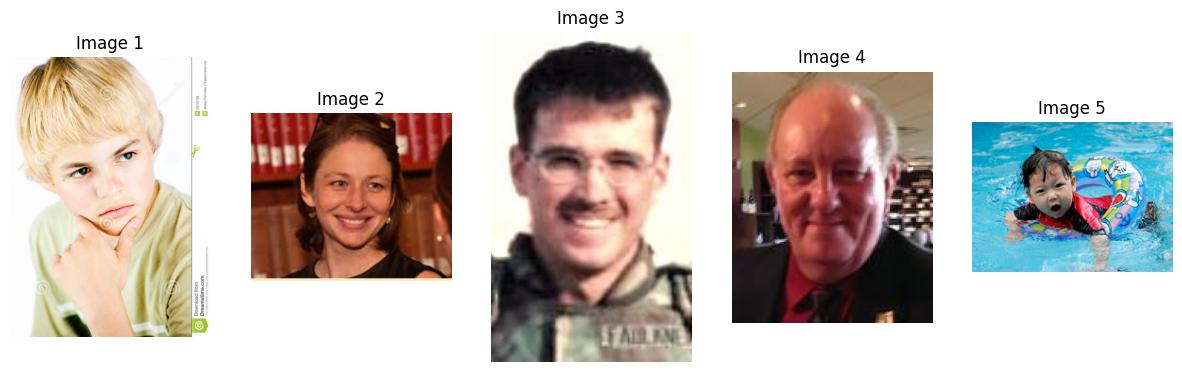

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to the 'part1' folder
part1_folder = '/content/UTKFace/part1'

# List of image files in the folder
image_files = [f for f in os.listdir(part1_folder) if f.endswith('.jpg')]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Number of images to display (e.g., first 5 random images)
num_images_to_display = 5

# Create a figure with subplots
plt.figure(figsize=(15, 15))

# Loop through the first few images (after shuffling)
for i in range(min(num_images_to_display, len(image_files))):
    image_path = os.path.join(part1_folder, image_files[i])

    # Load the image using OpenCV (it will be in BGR format)
    img = cv2.imread(image_path)

    # Convert BGR to RGB (for proper display)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a subplot for each image
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Image {i+1}')  # Add a title for each image

# Display the images
plt.show()

# Second Step: Import libraries

# Third Step: Begin Creating Model to predict Gender